# Computer Vision - P3

## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in **English**. 

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in **English**.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently. 

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.

**Deadline (Campus Virtual): Group A & F: November 7th, 23:00 h; Group B: November 14th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [2]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.util import img_as_float, random_noise
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, mark_boundaries
from skimage.transform import resize
from skimage.feature import canny
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction import image

%matplotlib inline

## 3.1 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images_notebook/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'barcelona.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.

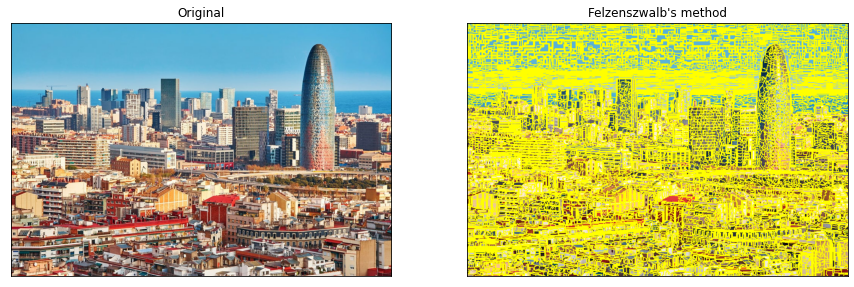

In [2]:
# Your solution here

barcelona_im = io.imread("images_notebook/barcelona.jpeg")

segments_fz = felzenszwalb(barcelona_im)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(barcelona_im)
axs[0].set_title("Original")
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(mark_boundaries(barcelona_im, segments_fz))
axs[1].set_title("Felzenszwalb's method")
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()


b) Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


Answer the following questions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?
- Does the image reduction affect the optimal values? 

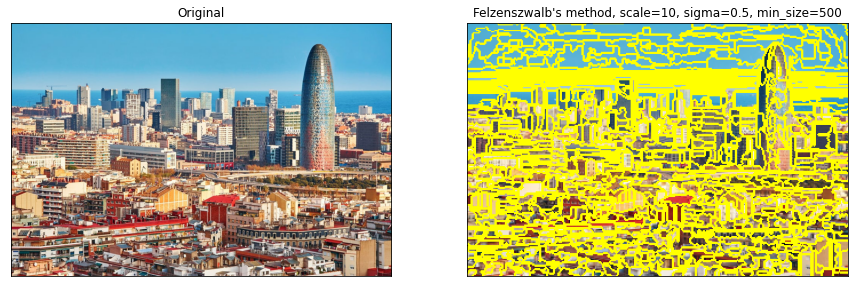

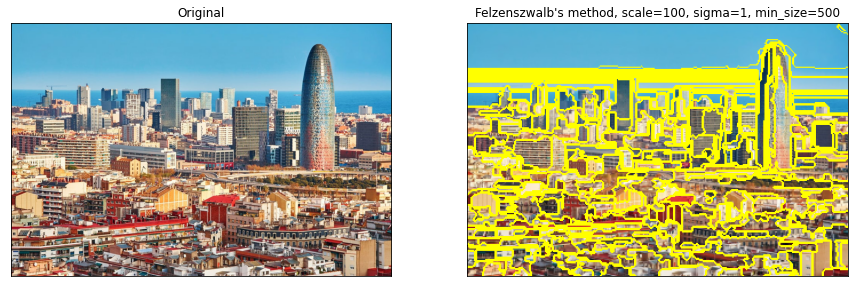

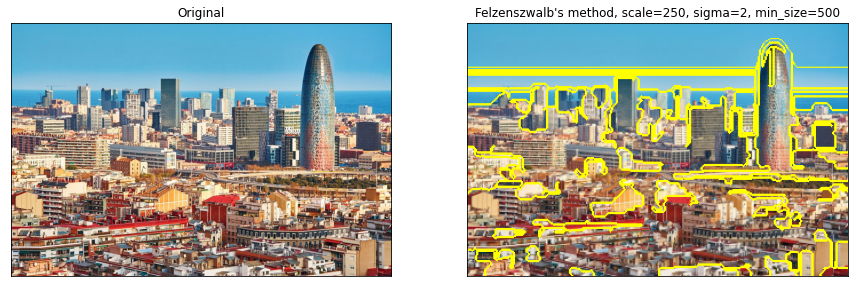

In [3]:
def segments_fz(img, scale, sigma, min_size):
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))

    segments_fz_parameters = felzenszwalb(resized_image, scale=scale, sigma=sigma, min_size=min_size)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(barcelona_im)
    axs[0].set_title("Original")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].imshow(mark_boundaries(resized_image, segments_fz_parameters))
    axs[1].set_title(f"Felzenszwalb's method, scale={scale}, sigma={sigma}, min_size={500}")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    plt.show()

segments_fz(barcelona_im, 10, 0.5, 25)
segments_fz(barcelona_im, 100, 1, 50)
segments_fz(barcelona_im, 250, 2, 100)

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

In [4]:
# Your solution here

# Agrupación rápida y basada en árbol de expansión mínima (minimum spanning tree) en la cuadrícula de imágenes.
# Primero suaviza. Conecta nodos (píxeles) en base a su similitud (distancia). Los combina hasta límite k.
# Capacidad para segmentar a múltiples escalas, Robustez ante variaciones en la iluminación y el ruido, Dificultad con la detección de límites finos, Requiere ajuste de parámetros

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

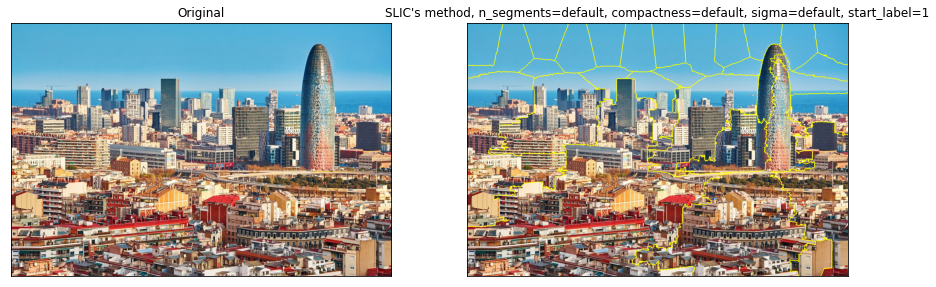

In [7]:
# Your solution here
segments_slic = slic(barcelona_im, start_label=1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(barcelona_im)
axs[0].set_title("Original")
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(mark_boundaries(barcelona_im, segments_slic))
axs[1].set_title(f"SLIC's method, n_segments=default, compactness=default, sigma=default, start_label={1}")
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


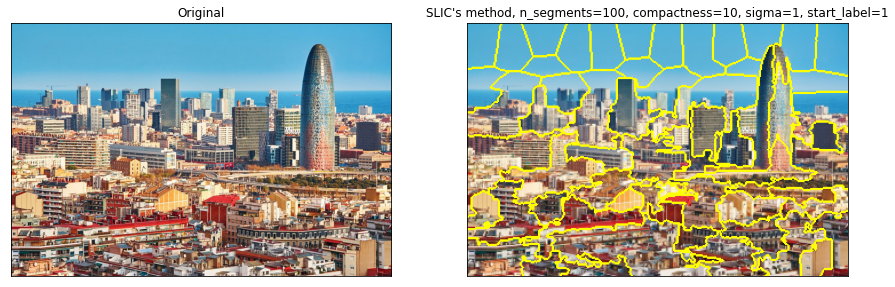

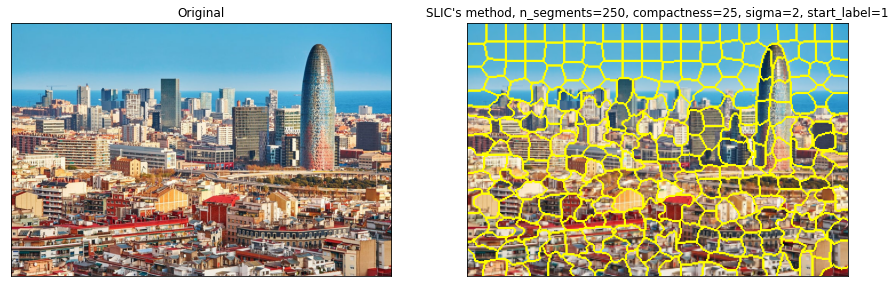

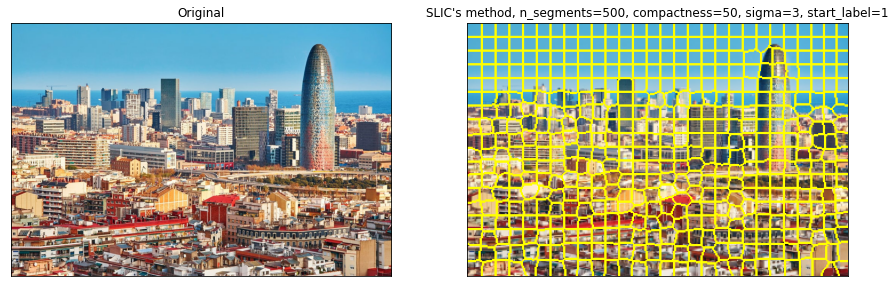

In [8]:
def segments_slic(img, n_segments, compactness, sigma):
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))

    segments_slic_parameters = slic(resized_image, n_segments=n_segments, compactness=compactness, sigma=sigma, start_label=1)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(barcelona_im)
    axs[0].set_title("Original")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].imshow(mark_boundaries(resized_image, segments_slic_parameters))
    axs[1].set_title(f"SLIC's method, n_segments={n_segments}, compactness={compactness}, sigma={sigma}, start_label={1}")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    plt.show()

segments_slic(barcelona_im, 100, 10, 1)
segments_slic(barcelona_im, 250, 25, 2)
segments_slic(barcelona_im, 500, 50, 3)

f) Comment what the algorithm is (in up to 3 lines).

In [7]:
# # Your solution here

# Basado en K-Means
# 1. Suaviza la imagen con un gaussiano (sigma)
# 2. Construye un espacio de características de 5 dimensiones basado en el color y la información espacial.
# 3. Agrupa mediante distancia ajustada con peso de proximidad
#     · Los valores más altos dan más peso a la proximidad del espacio, lo que hace que las formas de superpíxeles sean más cuadradas o cúbicas.
# Eficiencia, Buena segmentación en tiempo real, Control del número de segmentos, Dificultad en la segmentación de objetos con límites complejos

### Quickshift image segmentation

g) Segment the original image using the Quickshift algorithm. 

Create a loop where you explore kernel_size variations in order to obtain a better image segmentation. Argument why a higher or lower value improves the segmentation results. 


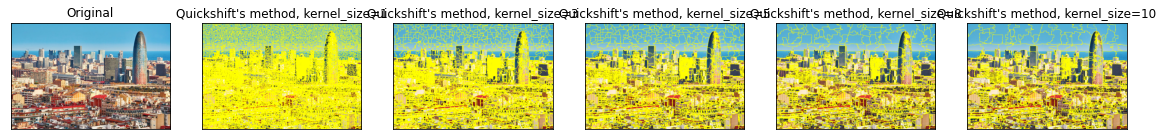

In [9]:
# Your solution here
# Create an array of kernel_size values to explore
kernel_sizes = [1, 3, 5, 8, 10]

fig, axs = plt.subplots(1, len(kernel_sizes)+1, figsize=(20, 10))
# Show the segmented image
axs[0].imshow(barcelona_im)
axs[0].set_title("Original")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Iterate through different kernel_size values
for i, kernel_size in enumerate(kernel_sizes,1):
    # Segment the image using Quickshift
    segments = quickshift(barcelona_im, kernel_size=kernel_size)

    # Show the segmented image
    axs[i].imshow(mark_boundaries(barcelona_im, segments))
    axs[i].set_title(f"Quickshift's method, kernel_size={kernel_size}")
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

h) Comment what the algorithm is (in up to 3 lines).

In [9]:
# # Your solution here
# Una de las mejores técnicas.
# 1. Elija un tamaño de ventana de búsqueda.
# 2. Elija la ubicación inicial de la ventana de búsqueda.
# 3. Calcule la ubicación promedia de los píxeles en la ventana de búsqueda.
# 4. Centre la ventana de búsqueda en la ubicación media calculada en el Paso 3.
# 5. Repita los pasos 3 y 4 hasta la convergencia. 
#     · Mueve iterativamente hacia la ubicación promedia de los píxeles hasta converger
# No requiere definir el número de segmentos, Adecuado para imágenes con texturas complejas, Requiere tiempo de cálculo

### Comparison of segmentation algorithms

Apply the best set of parameters of each algorithm and apply it to: 
1) Original image
1) Salt and pepper noise version of this image
2) Flipped image (horizontally)
3) Canny edge detector result of this image. 

Plot the image and its results of fezenswalb and SLIC algorithm in a 1x3 subplots. 

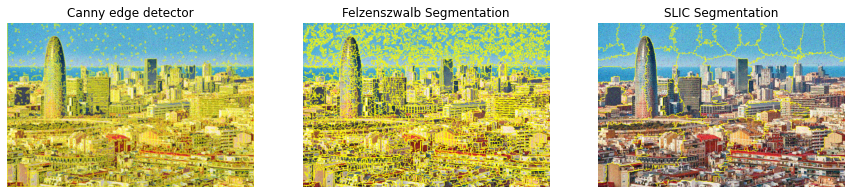

In [15]:
# Your solution here

# Create a salt and pepper noise version of the image
noisy_img = random_noise(barcelona_im, mode='s&p')

# Create a horizontally flipped version of the image using NumPy
flipped_img = np.fliplr(noisy_img)

# Convert flipped image to gray scale
flipped_gray_img = rgb2gray(flipped_img)

# Apply the Canny edge detector to the flipped image
edges_canny_img = canny(flipped_gray_img, sigma=1.5)

# Apply the best set of parameters for Felzenszwalb and SLIC to the flipped image
segments_felzenszwalb = felzenszwalb(flipped_img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(flipped_img, n_segments=100, compactness=10, sigma=1, start_label=1)

# Create subplots for Canny, Felzenszwalb and SLIC
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_title("Canny edge detector")
axs[0].imshow(mark_boundaries(flipped_img, edges_canny_img))
axs[0].axis('off')

# Plot Felzenszwalb segmentation for the flipped image
axs[1].set_title("Felzenszwalb Segmentation")
axs[1].imshow(mark_boundaries(flipped_img, segments_felzenszwalb))
axs[1].axis('off')

# Plot SLIC segmentation for the flipped image
axs[2].set_title("SLIC Segmentation")
axs[2].imshow(mark_boundaries(flipped_img, segments_slic))
axs[2].axis('off')

plt.show()

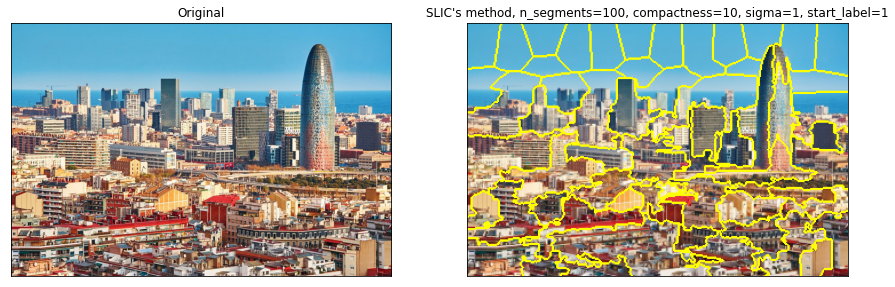

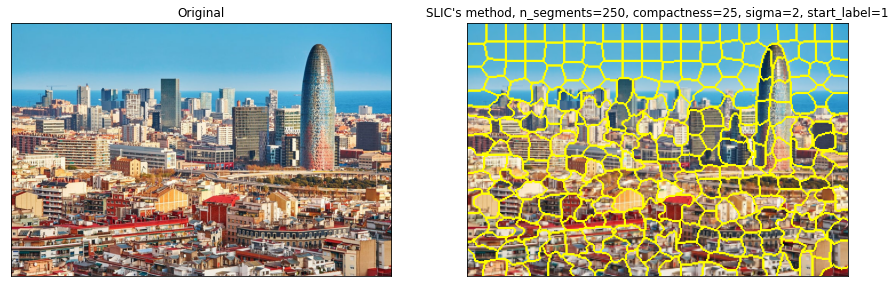

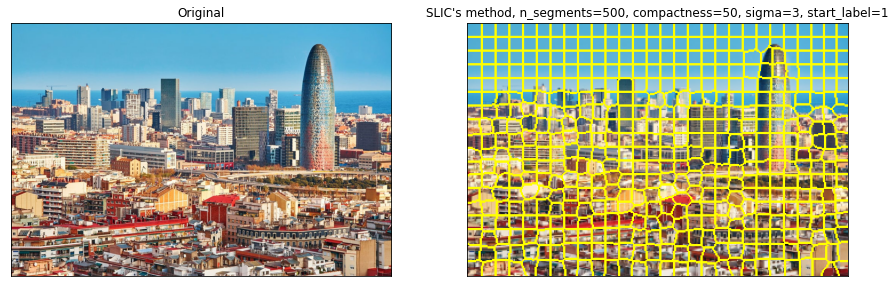

In [ ]:
# Your solution here
def segments_slic(img, n_segments, compactness, sigma):
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))
    segments_slic_parameters = slic(resized_image, n_segments=n_segments, compactness=compactness, sigma=sigma, start_label=1)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(barcelona_im)
    axs[0].set_title("Original")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].imshow(mark_boundaries(resized_image, segments_slic_parameters))
    axs[1].set_title(f"SLIC's method, n_segments={n_segments}, compactness={compactness}, sigma={sigma}, start_label={1}")
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    plt.show()

segments_slic(barcelona_im, 100, 10, 1)
segments_slic(barcelona_im, 250, 25, 2)
segments_slic(barcelona_im, 500, 50, 3)

- Do the transformations affect the segmentation? Why or why not? 
- Can the number of segments can be used as a criterion for the performance of the algorithms?

## 3.2 Segmentation via clustering

In this exercise, you will implement hierarchical clustering to segment the "images_notebook/loro.png" image in gray scales. First load and visualize the image, then implement hierarchical clustering over the pixels and plot the final results side by side to the original image

Hint: Sklearn has a hierarchical clustering implementation you should use. Reshape your dataset such that you have a 2 dimensional array. Use linkage "ward" and grid_to_graph function for the connectivity parameter. 

<img src="images_notebook/loro_segmentation.jpg" width=600>

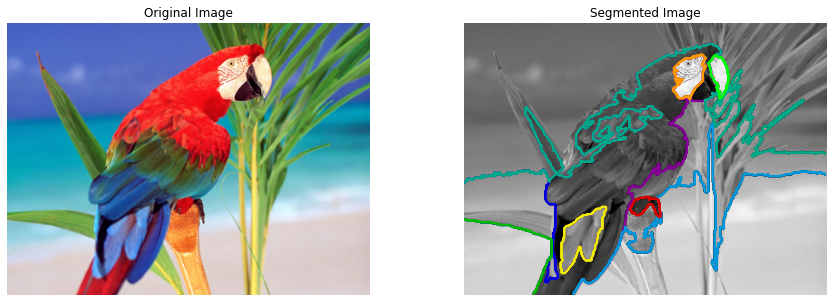

In [20]:
# Your solution here
# Load and display the original image
loro_im = io.imread('images_notebook/loro.png')

# Create subplots for Canny, Felzenszwalb and SLIC
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].set_title("Original Image")
axs[0].imshow(loro_im)
axs[0].axis('off')

# Convierte la imagen redimensionada a escala de grises
loro_gray_im = rgb2gray(loro_im)
w, h = loro_gray_im.shape

# Convierte la imagen a un array de punto flotante
loro_2d_im = loro_gray_im.reshape((-1, 1))

# Perform hierarchical clustering
connectivity = image.grid_to_graph(w, h)
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward', connectivity=connectivity)

# Fit the clustering algorithm to the 2D data of the image
clustering.fit(loro_2d_im)

# Reshape de las etiquetas a la forma de la imagen redimensionada
loro_segmented_im = np.reshape(clustering.labels_, loro_gray_im.shape)

# Segmented image with the contours
axs[1].imshow(loro_gray_im, cmap=plt.cm.gray)
for l in range(10):
    axs[1].contour(
        loro_segmented_im == l,
        colors=[
            plt.cm.nipy_spectral(l / float(10)),
        ],
    )
axs[1].set_title('Segmented Image')
axs[1].axis("off")

plt.show()

## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images_notebook/screenshot.png" width=600>

## 3.3 Segmentation of video shots

Read and visualize the sequence of images "images_notebook/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [12]:
# Your solution here

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images_notebook/histogramshot.png" width=600>
<img src="images_notebook/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

The plot above was obtain by using 64 bins histogram and the measure as mean of absolute difference. 

In [13]:
# Your solution here

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [14]:
# Example A
def data_gen():
    return enumerate(mean_differences)


In [15]:
# Your solution here

c) Show the initial and final images of each shot extracted as follows:

<img src="images_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot as shown in the reference image


In [16]:
# Your solution here

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [17]:
# Your solution here


e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [18]:
# Your solution here


f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [19]:
# Your solution here


## 3.4 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images_notebook/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [20]:
# Your solution here

b) What do the static background images represent? 

In [21]:
# Your solution here

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [22]:
# Your solution here

d) What happens if you subtract the background image from the original one?

In [23]:
# Your solution here

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [24]:
# Your solution here

f) Visualize the highest and lowest similarity frame with respect to the foreground images of each scene. You can use the metric of your like, explain why you picked it. 

In [25]:
# Your solution here
